<a href="https://colab.research.google.com/github/divyanshbajpai/EVA4-Coursework/blob/master/Assignment-9/Main_S9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
cd drive/My\ Drive/Session7

/content/drive/My Drive/Session7


In [2]:
!pwd
!ls

/content/drive/My Drive/Session7
data	      map.jpg		 network_blocks.py  test_transform.py
data_util.py  model_function.py  plot.py	    train_transform.py
gradcam.py    model.py		 __pycache__
img1.png      mymodel.pth	 resnet.py


In [3]:
import torch
from data_util import DataProducer as du
import model_function as mf
import model as mod
import plot as pp
import resnet as res
import gradcam

torch.Size([1, 10])


In [4]:
device = du.cuda_check()

CUDA: True
cuda:0


In [5]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

SEED = 1
batch_size=128
torch.manual_seed(SEED)
data_producer=du()
train_loader, test_loader = data_producer.get_dataloader(batch_size=batch_size)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
#mymodel=mod.Net(drop_val=0.1)
mymodel=res.ResNet18()

In [7]:
mf.model_summary(mymodel, device, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [8]:
EPOCHS = 25
mymodel =  mymodel.to(device)

train_acc, train_losses, test_acc, test_losses = mf.definemodel(mymodel, device,trainloader=train_loader, testloader=test_loader,epochs=EPOCHS,
                                                            lr=0.01,
                                                            decay=0.005)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 0


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.034489, Accuracy: 6331/10000 (63.31%)

EPOCH: 1


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.015358, Accuracy: 6673/10000 (66.73%)

EPOCH: 2


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.722465, Accuracy: 7507/10000 (75.07%)

EPOCH: 3


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.594480, Accuracy: 7925/10000 (79.25%)

EPOCH: 4


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.688105, Accuracy: 7681/10000 (76.81%)

EPOCH: 5


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.657755, Accuracy: 7742/10000 (77.42%)

EPOCH: 6


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.565956, Accuracy: 8100/10000 (81.00%)

EPOCH: 7


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.566716, Accuracy: 8065/10000 (80.65%)

EPOCH: 8


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.317638, Accuracy: 8922/10000 (89.22%)

EPOCH: 9


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.304946, Accuracy: 8941/10000 (89.41%)

EPOCH: 10


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.303746, Accuracy: 8955/10000 (89.55%)

EPOCH: 11


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.305116, Accuracy: 8982/10000 (89.82%)

EPOCH: 12


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.302767, Accuracy: 8975/10000 (89.75%)

EPOCH: 13


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.298591, Accuracy: 8985/10000 (89.85%)

EPOCH: 14


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.308093, Accuracy: 8974/10000 (89.74%)

EPOCH: 15


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.327482, Accuracy: 8932/10000 (89.32%)

EPOCH: 16


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.299198, Accuracy: 9010/10000 (90.10%)

EPOCH: 17


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.291311, Accuracy: 9030/10000 (90.30%)

EPOCH: 18


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.293858, Accuracy: 9014/10000 (90.14%)

EPOCH: 19


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.302664, Accuracy: 9014/10000 (90.14%)

EPOCH: 20


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.294929, Accuracy: 9024/10000 (90.24%)

EPOCH: 21


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.291975, Accuracy: 9021/10000 (90.21%)

EPOCH: 22


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.293583, Accuracy: 9028/10000 (90.28%)

EPOCH: 23


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.297595, Accuracy: 9027/10000 (90.27%)

EPOCH: 24


Loss=0.024930 Batch_id=390 Accuracy=99.87: 100%|██████████| 391/391 [00:56<00:00,  6.95it/s]



Test set: Average loss: 0.296456, Accuracy: 9032/10000 (90.32%)



In [9]:
mf.get_test_accuracy_cifar10(mymodel, device, test_loader)

Accuracy of the network on the 10000 test images: 90.32 %


In [10]:
mf.class_accuracy(mymodel, device, classes, test_loader)

Accuracy of plane : 93 %
Accuracy of   car : 100 %
Accuracy of  bird : 88 %
Accuracy of   cat : 75 %
Accuracy of  deer : 82 %
Accuracy of   dog : 89 %
Accuracy of  frog : 94 %
Accuracy of horse : 89 %
Accuracy of  ship : 95 %
Accuracy of truck : 89 %


/content/drive/My Drive/Session7/plot.py:22: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[0].set_xticks(np.arange(1,size_ep+1),size_ep/10)
/content/drive/My Drive/Session7/plot.py:30: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[1].set_xticks(np.arange(1,size_ep+1),size_ep/10)


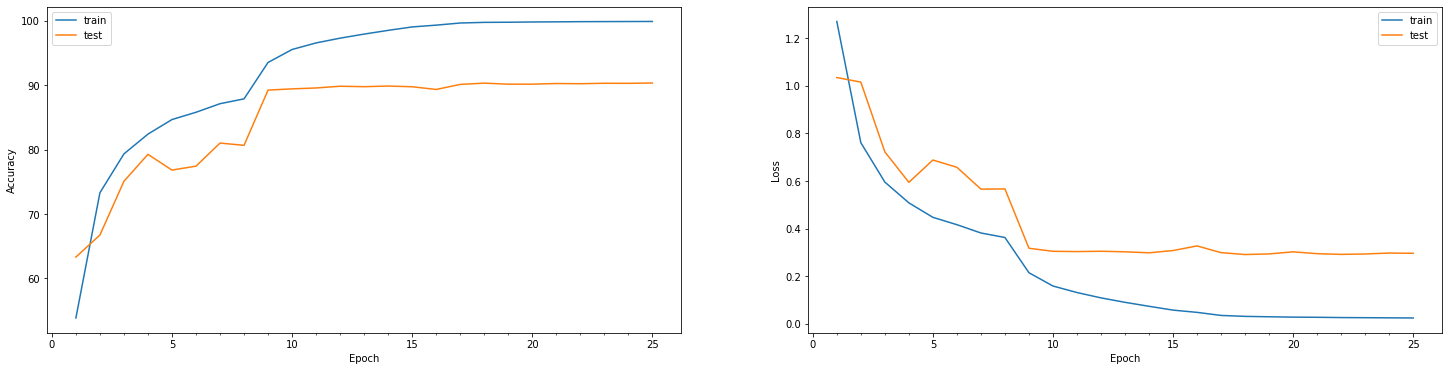

In [11]:
pp.model_acc_loss(train_acc,test_acc,train_losses,test_losses)

In [0]:
#torch.save(mymodel.state_dict(), '/content/drive/My Drive/Session7/mymodel.pth')

In [0]:
# mymodel=res.ResNet18()
# mymodel.load_state_dict(torch.load('/content/drive/My Drive/Session7/mymodel.pth'))
#mymodel =  mymodel.to(device)

In [14]:
data_producer=du()
_, test_loader = data_producer.get_dataloader(batch_size=1)
it = iter(test_loader)

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


frog


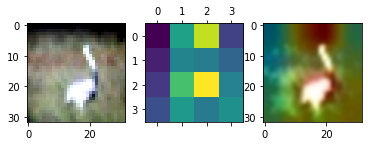

In [15]:
img,_=next(it)
gradcam.gradcamimpl(mymodel, img, classes)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


bird


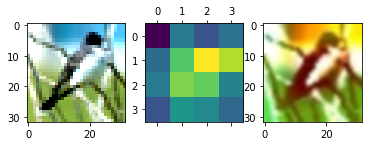

In [16]:
img,_=next(it)
gradcam.gradcamimpl(mymodel, img, classes)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


ship


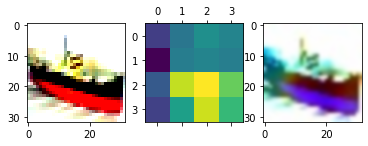

In [18]:
img,_=next(it)
gradcam.gradcamimpl(mymodel, img, classes)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


frog


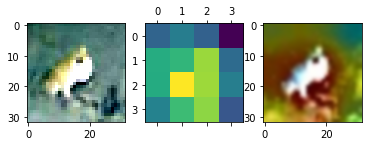

In [19]:
img,_=next(it)
gradcam.gradcamimpl(mymodel, img, classes)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


bird


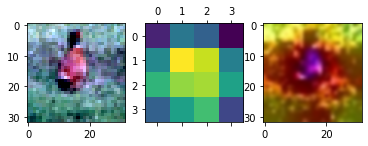

In [25]:
img,_=next(it)
gradcam.gradcamimpl(mymodel, img, classes)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


bird


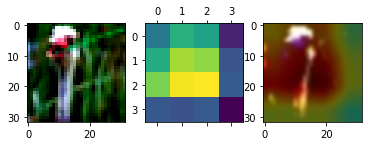

In [26]:
img,_=next(it)
gradcam.gradcamimpl(mymodel, img, classes)